In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("../data/clean_listings.csv")

In [3]:
dataForward = data.drop(["id"], axis=1)

# Linear Regression #

### Forward Selection ###

In [4]:
currentRegression = []
available = list(dataForward.columns)
# Dependent/responding variable
available.remove('review_scores_rating')

bestAllTimeAic = np.inf
bestForwardModel = None
flag = True

while flag:
    currentBestAic = np.inf
    print("Current best AIC = " + str(bestAllTimeAic))
    print("Current regression: " + ', '.join(currentRegression))
    toAdd = None
    for each in available:
        regTemp = currentRegression[:]
        regTemp.extend([each])
        currentLm = sm.OLS(dataForward.review_scores_rating, sm.add_constant(dataForward[regTemp])).fit()
        currentAic = currentLm.aic
        print("\tChecking " + each + ": AIC = " + str(currentAic))
        if currentAic < currentBestAic:
            toAdd = each
            bestForwardModel = currentLm
            currentBestAic = currentAic
    if currentBestAic < bestAllTimeAic:
        print("\t\tAdding " + toAdd + " to model. New best AIC = " + str(currentBestAic) + '\n\n')
        currentRegression.append(toAdd)
        available.remove(toAdd)
        bestAllTimeAic = currentBestAic
    else:
        print("\t\tAdding no new variables to model. Ending forward selection.")
        flag = False

Current best AIC = inf
Current regression: 
	Checking accommodates: AIC = 20854.735515369335
	Checking bathrooms: AIC = 20848.909300654603
	Checking bedrooms: AIC = 20853.743135069686
	Checking beds: AIC = 20855.39176554789
	Checking price: AIC = 20845.942588349073
	Checking number_of_reviews: AIC = 20851.29963508389
	Checking Unnamed: 8: AIC = 20848.652913454716
	Checking 24-HourCheck-in: AIC = 20847.069866055943
	Checking AirConditioning: AIC = 20842.226050728168
	Checking Breakfast: AIC = 20850.77089165804
	Checking Buzzer/WirelessIntercom: AIC = 20855.18406990308
	Checking CableTV: AIC = 20849.43531472069
	Checking CarbonMonoxideDetector: AIC = 20822.135315037413
	Checking Cat(s): AIC = 20841.394829163874
	Checking Dog(s): AIC = 20844.888503425183
	Checking Doorman: AIC = 20849.868369474363
	Checking ElevatorinBuilding: AIC = 20854.75164985998
	Checking Essentials: AIC = 20837.946780698294
	Checking Family/KidFriendly: AIC = 20854.89945235064
	Checking FireExtinguisher: AIC = 20811

	Checking SafetyCard: AIC = 20745.714681764235
	Checking SmokeDetector: AIC = 20758.624129375137
	Checking SmokingAllowed: AIC = 20759.10683517725
	Checking SuitableforEvents: AIC = 20754.96212209193
	Checking TV: AIC = 20750.086534312577
	Checking Washer: AIC = 20758.516280027034
	Checking WheelchairAccessible: AIC = 20758.861725920186
	Checking WirelessInternet: AIC = 20754.342819985177
		Adding SafetyCard to model. New best AIC = 20745.714681764235


Current best AIC = 20745.714681764235
Current regression: Shampoo, FireExtinguisher, FreeParkingonPremises, SafetyCard
	Checking accommodates: AIC = 20740.522266727734
	Checking bathrooms: AIC = 20744.22498444588
	Checking bedrooms: AIC = 20747.711357484986
	Checking beds: AIC = 20745.244706194477
	Checking price: AIC = 20742.27487848873
	Checking number_of_reviews: AIC = 20745.675139397576
	Checking Unnamed: 8: AIC = 20746.94179564734
	Checking 24-HourCheck-in: AIC = 20746.90791582415
	Checking AirConditioning: AIC = 20740.01586897437


	Checking bathrooms: AIC = 20694.11462599715
	Checking bedrooms: AIC = 20697.748364684227
	Checking beds: AIC = 20699.105501937735
	Checking number_of_reviews: AIC = 20698.100070261582
	Checking Unnamed: 8: AIC = 20700.49547098198
	Checking 24-HourCheck-in: AIC = 20699.07771874385
	Checking AirConditioning: AIC = 20695.31390929764
	Checking Breakfast: AIC = 20699.66666308268
	Checking Buzzer/WirelessIntercom: AIC = 20698.31959937394
	Checking CableTV: AIC = 20700.518310768057
	Checking CarbonMonoxideDetector: AIC = 20694.381364955392
	Checking Dog(s): AIC = 20697.175304823963
	Checking Doorman: AIC = 20699.471211739954
	Checking ElevatorinBuilding: AIC = 20699.143533985
	Checking Essentials: AIC = 20700.046198641663
	Checking Family/KidFriendly: AIC = 20700.059483255427
	Checking FirstAidKit: AIC = 20696.686272975763
	Checking Gym: AIC = 20698.6821186289
	Checking HairDryer: AIC = 20699.790355526144
	Checking Hangers: AIC = 20699.12701269662
	Checking Heating: AIC = 20700.742996264584


	Checking HairDryer: AIC = 20685.20872169066
	Checking Hangers: AIC = 20684.715838601027
	Checking Heating: AIC = 20685.761244877976
	Checking IndoorFireplace: AIC = 20683.43971888475
	Checking Iron: AIC = 20684.96496935101
	Checking Kitchen: AIC = 20684.683299182274
	Checking LaptopFriendlyWorkspace: AIC = 20682.405339769317
	Checking LockonBedroomDoor: AIC = 20685.541199691652
	Checking Otherpet(s): AIC = 20685.75748279986
	Checking PetsAllowed: AIC = 20684.65907123749
	Checking Pool: AIC = 20685.257999689373
	Checking SmokeDetector: AIC = 20685.200287349136
	Checking SmokingAllowed: AIC = 20685.70441135406
	Checking SuitableforEvents: AIC = 20681.596195710095
	Checking Washer: AIC = 20683.958044674302
	Checking WheelchairAccessible: AIC = 20684.306032282
	Checking WirelessInternet: AIC = 20682.919228376995
		Adding Dog(s) to model. New best AIC = 20681.090208358917


Current best AIC = 20681.090208358917
Current regression: Shampoo, FireExtinguisher, FreeParkingonPremises, SafetyCar

	Checking ElevatorinBuilding: AIC = 20677.61411893478
	Checking Essentials: AIC = 20678.10833740428
	Checking Family/KidFriendly: AIC = 20677.89567679583
	Checking FirstAidKit: AIC = 20676.51945667062
	Checking Gym: AIC = 20677.20635388599
	Checking HairDryer: AIC = 20676.83697810232
	Checking Hangers: AIC = 20677.768238911478
	Checking Heating: AIC = 20678.14859983231
	Checking Iron: AIC = 20677.512268965067
	Checking Kitchen: AIC = 20677.275413910957
	Checking LockonBedroomDoor: AIC = 20677.625792604034
	Checking Otherpet(s): AIC = 20678.12635119936
	Checking PetsAllowed: AIC = 20676.80147458993
	Checking Pool: AIC = 20678.003551989506
	Checking SmokeDetector: AIC = 20677.84098961109
	Checking SmokingAllowed: AIC = 20678.07978303454
	Checking Washer: AIC = 20676.920554094722
	Checking WheelchairAccessible: AIC = 20677.45349801708
	Checking WirelessInternet: AIC = 20676.033089995348
		Adding WirelessInternet to model. New best AIC = 20676.033089995348


Current best AIC = 20676.033089

In [5]:
bestForwardModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.066
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     11.64
Date:                  Thu, 06 Dec 2018   Prob (F-statistic):           4.64e-35
Time:                          01:36:45   Log-Likelihood:                -10318.
No. Observations:                  3153   AIC:                         2.068e+04
Df Residuals:                      3133   BIC:                         2.080e+04
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      90.1229      0.735    122.568      0.000      88.681      91.565
Shampoo                     1.2922      0.271      4.764      0.000       0.760       1.824
FireExtinguisher            0.7280      0.260      2.805      0.005       0.219       1.237
FreeParkingonPremises       0.8788      0.246      3.570      0.000       0.396       1.361
SafetyCard                  0.9707      0.311      3.124      0.002       0.361       1.580
TV                          0.6930      0.261      2.658      0.008       0.182       1.204
accommodates               -0.5174      0.082     -6.348      0.000      -0.677      -0.358
price                       0.0081      0.002      4.625      0.000       0.005       0.012
Cat(s)                      1.0299      0.385      2.674      0.008       0.275       1.785
bathrooms                   0.6010      0.239      2.512      0.012       0.132       1.070
CarbonMonoxideDetector      0.5690      0.266      2.137      0.033       0.047       1.091
AirConditioning             0.8431      0.311      2.710      0.007       0.233       1.453
HotTub                     -0.8565      0.439     -1.950      0.051      -1.718       0.005
Dog(s)                      0.6385      0.343      1.864      0.062      -0.033       1.310
SuitableforEvents          -1.0036      0.493     -2.035      0.042      -1.970      -0.037
LaptopFriendlyWorkspace     0.6465      0.317      2.040      0.041       0.025       1.268
IndoorFireplace             0.4589      0.282      1.628      0.104      -0.094       1.012
number_of_reviews           0.0042      0.003      1.431      0.152      -0.002       0.010
WirelessInternet            1.0382      0.705      1.472      0.141      -0.345       2.421
Buzzer/WirelessIntercom    -0.4618      0.346     -1.334      0.182      -1.141       0.217
==============================================================================
Omnibus:                     2049.973   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36541.512
Skew:                          -2.816   Prob(JB):                         0.00
Kurtosis:                      18.698   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Backward Selection ###

In [10]:
currentRegression = list(dataForward.columns)
currentRegression.remove('review_scores_rating')

bestAllTimeAic = np.inf
flag = True
bestBackwardModel = None

while flag:
    currentBestAic = np.inf
    print("Current best AIC = " + str(bestAllTimeAic))
    print("Current regression: " + ', '.join(currentRegression))
    toDrop = None
    for each in currentRegression:
        regTemp = currentRegression[:]
        regTemp.remove(each)
        currentLm = sm.OLS(dataForward.review_scores_rating, sm.add_constant(dataForward[regTemp])).fit()
        currentAic = currentLm.aic
        print("\tChecking " + each + ": AIC = " + str(currentAic))
        if currentAic <= currentBestAic:
            toDrop = each
            bestBackwardModel = currentLm
            currentBestAic = currentAic
    if currentBestAic <= bestAllTimeAic:
        print("\t\tDropping " + toDrop + " from model. New best AIC = " + str(currentBestAic) + '\n\n')
        currentRegression.remove(toDrop)
        bestAllTimeAic = currentBestAic
    else:
        print("\t\tDroping no new variables from model. Ending backward selection.")
        flag = False

Current best AIC = inf
Current regression: accommodates, bathrooms, bedrooms, beds, price, number_of_reviews, Unnamed: 8, 24-HourCheck-in, AirConditioning, Breakfast, Buzzer/WirelessIntercom, CableTV, CarbonMonoxideDetector, Cat(s), Dog(s), Doorman, ElevatorinBuilding, Essentials, Family/KidFriendly, FireExtinguisher, FirstAidKit, FreeParkingonPremises, Gym, HairDryer, Hangers, Heating, HotTub, IndoorFireplace, Iron, Kitchen, LaptopFriendlyWorkspace, LockonBedroomDoor, Otherpet(s), PetsAllowed, Pool, SafetyCard, Shampoo, SmokeDetector, SmokingAllowed, SuitableforEvents, TV, Washer, WheelchairAccessible, WirelessInternet
	Checking accommodates: AIC = 20730.59395228745
	Checking bathrooms: AIC = 20716.18578036216
	Checking bedrooms: AIC = 20712.648177478906
	Checking beds: AIC = 20712.572802423496
	Checking price: AIC = 20728.70520829123
	Checking number_of_reviews: AIC = 20713.63249278702
	Checking Unnamed: 8: AIC = 20712.218938929356
	Checking 24-HourCheck-in: AIC = 20712.22106959812
	

	Checking price: AIC = 20722.725461347316
	Checking number_of_reviews: AIC = 20707.640618168185
	Checking AirConditioning: AIC = 20712.8599941303
	Checking Breakfast: AIC = 20706.59413645883
	Checking Buzzer/WirelessIntercom: AIC = 20707.363610205844
	Checking CableTV: AIC = 20706.643960002802
	Checking CarbonMonoxideDetector: AIC = 20711.024925273254
	Checking Cat(s): AIC = 20712.705984639673
	Checking Dog(s): AIC = 20709.383653450517
	Checking Doorman: AIC = 20707.910482474184
	Checking ElevatorinBuilding: AIC = 20706.45063430031
	Checking Essentials: AIC = 20706.307869390752
	Checking Family/KidFriendly: AIC = 20706.41973050274
	Checking FireExtinguisher: AIC = 20712.24761868492
	Checking FirstAidKit: AIC = 20707.75052514265
	Checking FreeParkingonPremises: AIC = 20719.718813149873
	Checking Gym: AIC = 20706.6964773733
	Checking HairDryer: AIC = 20707.240186897776
	Checking Hangers: AIC = 20706.387367493055
	Checking Heating: AIC = 20706.261999045837
	Checking HotTub: AIC = 20707.86

	Checking Family/KidFriendly: AIC = 20700.534792275907
	Checking FireExtinguisher: AIC = 20706.389020041082
	Checking FirstAidKit: AIC = 20701.87461861075
	Checking FreeParkingonPremises: AIC = 20713.760140635248
	Checking Gym: AIC = 20700.89178747528
	Checking HairDryer: AIC = 20701.345402953604
	Checking Hangers: AIC = 20700.489738671902
	Checking HotTub: AIC = 20702.81629103252
	Checking IndoorFireplace: AIC = 20702.502597214803
	Checking Kitchen: AIC = 20700.875052704974
	Checking LaptopFriendlyWorkspace: AIC = 20703.51021708842
	Checking LockonBedroomDoor: AIC = 20701.16119003323
	Checking Otherpet(s): AIC = 20700.434183144916
	Checking PetsAllowed: AIC = 20701.78729861463
	Checking SafetyCard: AIC = 20707.286498739588
	Checking Shampoo: AIC = 20724.445378001838
	Checking SmokeDetector: AIC = 20700.969868415712
	Checking SmokingAllowed: AIC = 20700.44090538392
	Checking SuitableforEvents: AIC = 20704.060962986732
	Checking TV: AIC = 20707.420642527497
	Checking Washer: AIC = 20701

	Checking CableTV: AIC = 20693.262014220672
	Checking CarbonMonoxideDetector: AIC = 20697.87366507218
	Checking Cat(s): AIC = 20699.350947530485
	Checking Dog(s): AIC = 20696.044748317494
	Checking Doorman: AIC = 20694.54977928878
	Checking ElevatorinBuilding: AIC = 20693.105233499013
	Checking FireExtinguisher: AIC = 20698.83094581797
	Checking FirstAidKit: AIC = 20694.426699048134
	Checking FreeParkingonPremises: AIC = 20706.14544900064
	Checking Gym: AIC = 20693.455643427762
	Checking HairDryer: AIC = 20693.867090690437
	Checking HotTub: AIC = 20695.304529150584
	Checking IndoorFireplace: AIC = 20695.03138164302
	Checking Kitchen: AIC = 20693.38335774884
	Checking LaptopFriendlyWorkspace: AIC = 20697.249532049293
	Checking LockonBedroomDoor: AIC = 20693.659985277627
	Checking PetsAllowed: AIC = 20694.414274636078
	Checking SafetyCard: AIC = 20699.698073331056
	Checking Shampoo: AIC = 20717.066447678437
	Checking SmokeDetector: AIC = 20693.52443608795
	Checking SuitableforEvents: AIC

	Checking Doorman: AIC = 20687.69586504763
	Checking FireExtinguisher: AIC = 20691.93328577849
	Checking FirstAidKit: AIC = 20687.590921380717
	Checking FreeParkingonPremises: AIC = 20699.04831357494
	Checking Gym: AIC = 20686.524168680662
	Checking HairDryer: AIC = 20686.948988316737
	Checking HotTub: AIC = 20688.216633996264
	Checking IndoorFireplace: AIC = 20688.1138472807
	Checking Kitchen: AIC = 20686.43098174389
	Checking LaptopFriendlyWorkspace: AIC = 20690.378338919407
	Checking LockonBedroomDoor: AIC = 20686.677002826087
	Checking PetsAllowed: AIC = 20687.50307987356
	Checking SafetyCard: AIC = 20692.984426801362
	Checking Shampoo: AIC = 20710.2531555947
	Checking SmokeDetector: AIC = 20686.626603429628
	Checking SuitableforEvents: AIC = 20689.7614857994
	Checking TV: AIC = 20692.912009378222
	Checking Washer: AIC = 20686.74902936109
	Checking WirelessInternet: AIC = 20688.762002956122
		Dropping CableTV from model. New best AIC = 20686.378684384545


Current best AIC = 20686.

	Checking FireExtinguisher: AIC = 20684.86977470073
	Checking FirstAidKit: AIC = 20680.48605902597
	Checking FreeParkingonPremises: AIC = 20692.636044975065
	Checking HairDryer: AIC = 20679.828555138185
	Checking HotTub: AIC = 20682.06746298886
	Checking IndoorFireplace: AIC = 20681.232048512793
	Checking LaptopFriendlyWorkspace: AIC = 20682.888546705595
	Checking PetsAllowed: AIC = 20680.028747066932
	Checking SafetyCard: AIC = 20685.45950374708
	Checking Shampoo: AIC = 20702.532370762863
	Checking SmokeDetector: AIC = 20679.36399292897
	Checking SuitableforEvents: AIC = 20682.64748362624
	Checking TV: AIC = 20686.801001251915
	Checking Washer: AIC = 20679.807757813585
	Checking WirelessInternet: AIC = 20681.2924976665
		Dropping SmokeDetector from model. New best AIC = 20679.36399292897


Current best AIC = 20679.36399292897
Current regression: accommodates, bathrooms, price, number_of_reviews, AirConditioning, Buzzer/WirelessIntercom, CarbonMonoxideDetector, Cat(s), Dog(s), Doorman,

	Checking Dog(s): AIC = 20677.395832998445
	Checking FireExtinguisher: AIC = 20680.09075330285
	Checking FirstAidKit: AIC = 20676.17541300677
	Checking FreeParkingonPremises: AIC = 20689.13622799026
	Checking HotTub: AIC = 20678.203019292523
	Checking IndoorFireplace: AIC = 20677.025757555602
	Checking LaptopFriendlyWorkspace: AIC = 20678.407348688426
	Checking SafetyCard: AIC = 20681.016342738953
	Checking Shampoo: AIC = 20696.6478857958
	Checking SuitableforEvents: AIC = 20679.02881163149
	Checking TV: AIC = 20681.406200157522
	Checking Washer: AIC = 20676.473627847834
	Checking WirelessInternet: AIC = 20676.923945136958
		Dropping FirstAidKit from model. New best AIC = 20676.17541300677


Current best AIC = 20676.17541300677
Current regression: accommodates, bathrooms, price, AirConditioning, CarbonMonoxideDetector, Cat(s), Dog(s), FireExtinguisher, FreeParkingonPremises, HotTub, IndoorFireplace, LaptopFriendlyWorkspace, SafetyCard, Shampoo, SuitableforEvents, TV, Washer, WirelessIn

In [7]:
bestBackwardModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.065
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     12.77
Date:                  Thu, 06 Dec 2018   Prob (F-statistic):           2.28e-35
Time:                          01:37:05   Log-Likelihood:                -10320.
No. Observations:                  3153   AIC:                         2.068e+04
Df Residuals:                      3135   BIC:                         2.079e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      90.1339      0.731    123.283      0.000      88.700      91.567
accommodates               -0.5090      0.081     -6.258      0.000      -0.668      -0.350
bathrooms                   0.6082      0.239      2.546      0.011       0.140       1.077
price                       0.0077      0.002      4.429      0.000       0.004       0.011
AirConditioning             0.8036      0.310      2.596      0.009       0.197       1.411
CarbonMonoxideDetector      0.5650      0.266      2.123      0.034       0.043       1.087
Cat(s)                      1.0689      0.385      2.778      0.005       0.315       1.823
Dog(s)                      0.6947      0.342      2.034      0.042       0.025       1.364
FireExtinguisher            0.7484      0.259      2.886      0.004       0.240       1.257
FreeParkingonPremises       0.9230      0.243      3.805      0.000       0.447       1.399
HotTub                     -0.9318      0.437     -2.132      0.033      -1.789      -0.075
IndoorFireplace             0.4591      0.282      1.629      0.103      -0.093       1.012
LaptopFriendlyWorkspace     0.6256      0.316      1.979      0.048       0.006       1.245
SafetyCard                  0.9255      0.308      3.001      0.003       0.321       1.530
Shampoo                     1.2935      0.269      4.801      0.000       0.765       1.822
SuitableforEvents          -1.0338      0.493     -2.097      0.036      -2.000      -0.067
TV                          0.6636      0.260      2.550      0.011       0.153       1.174
WirelessInternet            1.0854      0.705      1.540      0.124      -0.296       2.467
==============================================================================
Omnibus:                     2064.999   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37143.981
Skew:                          -2.842   Prob(JB):                         0.00
Kurtosis:                      18.825   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Residual Plot of Review Scores Rating')

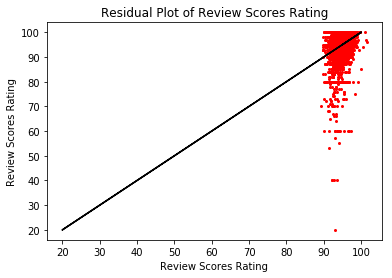

In [8]:
plt.scatter(bestBackwardModel.predict(), dataForward.review_scores_rating, color = 'red', marker = 'o', s=4)
plt.plot(dataForward.review_scores_rating, dataForward.review_scores_rating, color = 'black')
plt.xlabel("Review Scores Rating")
plt.ylabel("Review Scores Rating")
plt.title("Residual Plot of Review Scores Rating")

Text(0.5,1,'Residual Plot of Review Scores Rating')

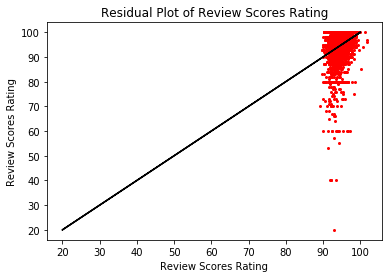

In [9]:
plt.scatter(bestForwardModel.predict(), dataForward.review_scores_rating, color = 'red', marker = 'o', s=4)
plt.plot(dataForward.review_scores_rating, dataForward.review_scores_rating, color = 'black')
plt.xlabel("Review Scores Rating")
plt.ylabel("Review Scores Rating")
plt.title("Residual Plot of Review Scores Rating")